## Lab Title : Cyber Crime Analysis                                              

## Project Objective : 
####                                          To know how the  cyber crime analysis in different states and territories. User can accordingly manipulate how in each state or territory the cyber crime happens.I build a model and done the analysis of cyber crime with available independent variables.  Further, the model will be a good way for user to understand the cyber crime analysis of a new state or area.


## Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Deriving new features

### Step 5 : Train-Test Split and feature scaling

### Step 6 : Model Building

### Step 7 : Accuracy and Evaluation

## Step 1 : Reading and understanding of data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv("cyber_crime.csv")
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   S. No                                             39 non-null     object 
 1   Category                                          39 non-null     object 
 2   State/UT                                          39 non-null     object 
 3   2016                                              39 non-null     int64  
 4   2017                                              39 non-null     int64  
 5   2018                                              39 non-null     int64  
 6   Percentage Share of State/UT (2018)               39 non-null     float64
 7   Mid-Year Projected Population (in Lakhs) (2018)+  39 non-null     float64
 8   Rate of Total Cyber Crimes (2018)++               39 non-null     float64
dtypes: float64(3), int64(3),

In [4]:
df.shape

(39, 9)

In [5]:
df.columns

Index(['S. No', 'Category', 'State/UT', '2016', '2017', '2018',
       'Percentage Share of State/UT (2018)',
       'Mid-Year Projected Population (in Lakhs) (2018)+',
       'Rate of Total Cyber Crimes (2018)++'],
      dtype='object')

In [6]:
df.describe()

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,947.461538,1676.615385,2096.000000,7.689744,1017.987179,1.689744
std,2724.974532,4832.658115,6065.161416,22.257391,2885.991893,1.811193
min,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000
25%,9.500000,11.500000,24.500000,0.100000,18.300000,0.500000
50%,102.000000,176.000000,239.000000,0.900000,284.000000,1.000000
75%,439.500000,772.000000,886.500000,3.250000,663.850000,2.200000
max,12317.000000,21796.000000,27248.000000,100.000000,13233.800000,8.900000


## Step 2 : Data cleaning and Preparation


In [7]:
df.isnull().sum()

S. No                                               0
Category                                            0
State/UT                                            0
2016                                                0
2017                                                0
2018                                                0
Percentage Share of State/UT (2018)                 0
Mid-Year Projected Population (in Lakhs) (2018)+    0
Rate of Total Cyber Crimes (2018)++                 0
dtype: int64

In [8]:
df['Category'].value_counts()

State                30
Union Territory       8
Total (All India)     1
Name: Category, dtype: int64

## Step 3 : Visualizing the data

In [9]:
df.corr(numeric_only=True)

,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++
2016,1.00000,0.998590,0.993830,0.993860,0.992970,0.136820
2017,0.99859,1.000000,0.998014,0.998030,0.991394,0.164416
2018,0.99383,0.998014,1.000000,0.999999,0.986735,0.200750
Percentage Share of State/UT (2018),0.99386,0.998030,0.999999,1.000000,0.986789,0.200419
Mid-Year Projected Population (in Lakhs) (2018)+,0.99297,0.991394,0.986735,0.986789,1.000000,0.077051
Rate of Total Cyber Crimes (2018)++,0.13682,0.164416,0.200750,0.200419,0.077051,1.000000


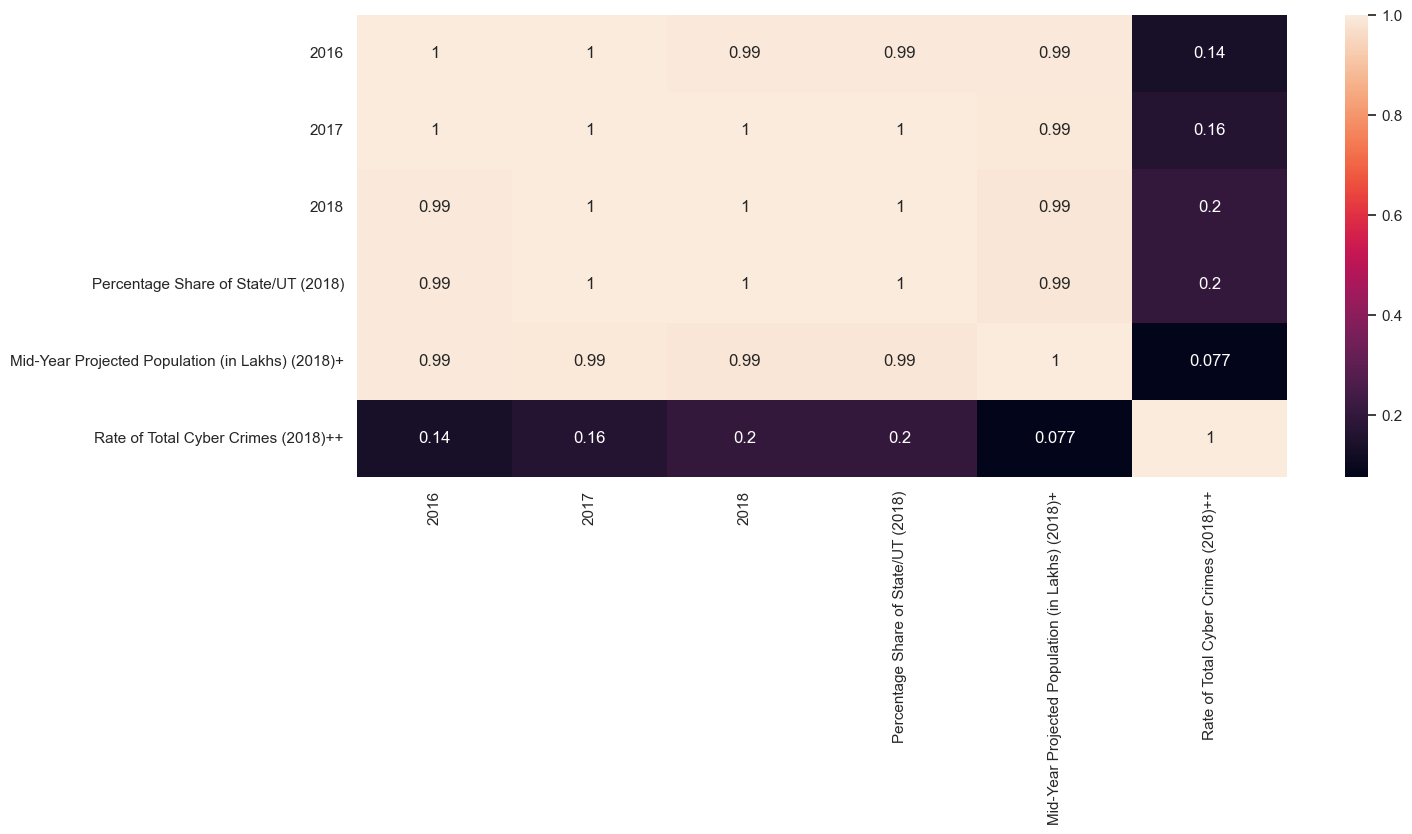

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

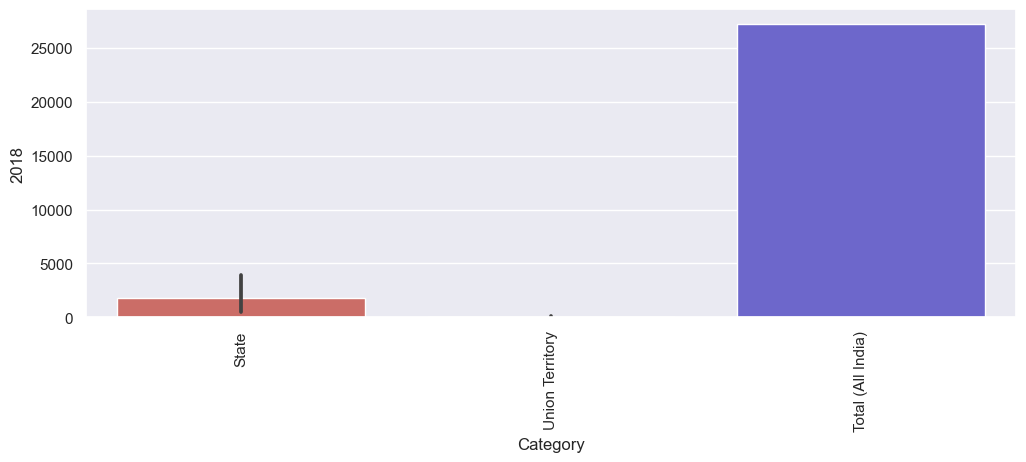

In [11]:
plt.figure(figsize=(12,4))
sns.barplot(x = 'Category', y = '2018', data = df, palette='hls')
plt.xticks(rotation = 90)
plt.show()

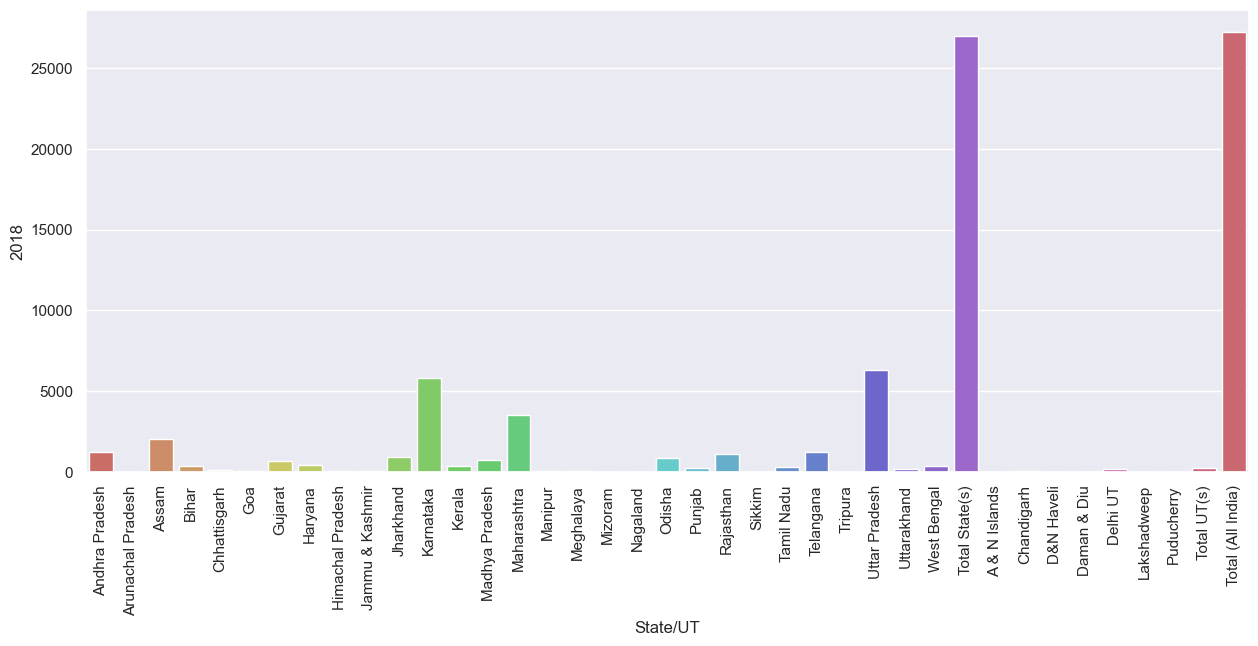

In [12]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'State/UT', y = '2018', data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [15]:
df['Rate of Total Cyber Crimes (2018)++'].unique()

array([2.3, 0.5, 5.9, 0.3, 1.9, 1. , 1.5, 0.9, 2.5, 8.9, 2.9, 0.1, 0.8,
       1.4, 0.2, 0.4, 3.3, 2.8, 2.1, 1.8, 2.6, 0. , 6. ])

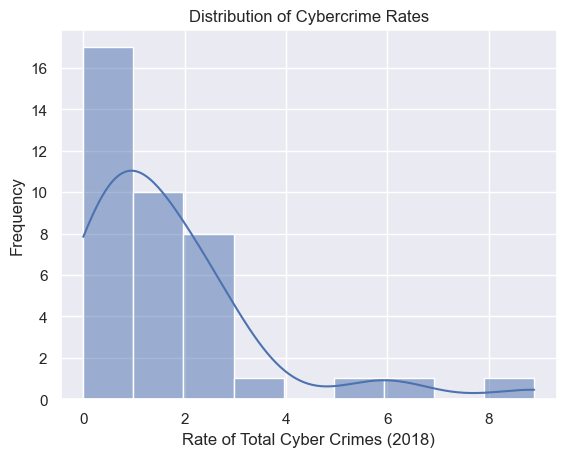

In [13]:
sns.histplot(df['Rate of Total Cyber Crimes (2018)++'], kde=True)
plt.title('Distribution of Cybercrime Rates')
plt.xlabel('Rate of Total Cyber Crimes (2018)')
plt.ylabel('Frequency')
plt.show()

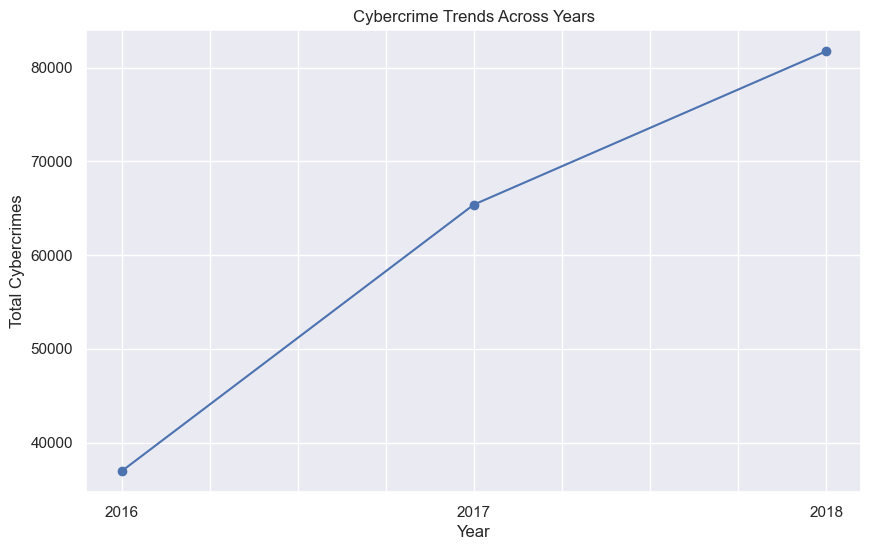

In [32]:
yearly_crimes = df[['2016', '2017', '2018']].sum()
plt.figure(figsize=(10, 6))
yearly_crimes.plot(kind='line', marker='o')
plt.title('Cybercrime Trends Across Years')
plt.xlabel('Year')
plt.ylabel('Total Cybercrimes')
plt.grid(True)
plt.show()

# Step 4 : Deriving new features¶


In [16]:
df['total_year'] = df['2016']+df['2017']+df['2018']
df.head()

,S. No,Category,State/UT,2016,2017,2018,Percentage Share of State/UT (2018),Mid-Year Projected Population (in Lakhs) (2018)+,Rate of Total Cyber Crimes (2018)++,total_year
0,1,State,Andhra Pradesh,616,931,1207,4.4,520.3,2.3,2754
1,2,State,Arunachal Pradesh,4,1,7,0.0,14.9,0.5,12
2,3,State,Assam,696,1120,2022,7.4,340.4,5.9,3838
3,4,State,Bihar,309,433,374,1.4,1183.3,0.3,1116
4,5,State,Chhattisgarh,90,171,139,0.5,284.7,0.5,400


In [36]:
crime_data_new = df[['2016', '2017', '2018']]
crime_data_new.head()

,2016,2017,2018
0,616,931,1207
1,4,1,7
2,696,1120,2022
3,309,433,374
4,90,171,139


In [39]:
crime_data_new.transpose().head()


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
2016,616,4,696,309,90,31,362,401,31,28,...,12187,3,26,1,0,98,0,2,130,12317
2017,931,1,1120,433,171,13,458,504,56,63,...,21593,3,32,1,0,162,0,5,203,21796
2018,1207,7,2022,374,139,29,702,418,69,73,...,27004,7,30,0,0,189,4,14,244,27248


## Step 5 : Train-Test Split and feature scaling

In [17]:
data_x=df[['2016','2017','2018']]
data_y=df['total_year']

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(data_x)

x_train, x_test, y_train, y_test = train_test_split(x, data_y, test_size=0.2, random_state=42)

## Step 6 : Model Building

### Decision Tree regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report

reg = DecisionTreeRegressor(max_depth=6)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

In [30]:

print("Train Accuracy :", reg.score(x_train, y_train))
print("Test Accuracy :", reg.score(x_test, y_test))



Train Accuracy : 0.9999982774891496
Test Accuracy : 0.8758129121934295
